In [96]:
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML, Image
rc('animation', html='html5')
import plotly
import plotly.offline as off
import plotly.plotly as py
import plotly.graph_objs as go
from ipywidgets import interact, FloatSlider, RadioButtons,Dropdown
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 

In [49]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import h5py
import os
from tqdm import tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact, FloatSlider, RadioButtons,Dropdown

Populating the interactive namespace from numpy and matplotlib


/Users/james/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['style', 'rc']
`%matplotlib` prevents importing * from pylab and numpy

/Users/james/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



## 3D

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def plot_3d(rnanames,count_,num,lengthdat,azim=50,elev=20):
    '''
    count_ 长度种类  num rna数量
    '''
    fig = plt.figure(figsize=(20,16))
    ax1 = fig.gca(projection="3d")

    xpos = np.repeat(np.arange(1,count_+1),num).reshape(count_,-1).T.ravel()
    ypos = np.repeat(range(num),count_).ravel()
    num_elements = len(xpos)
    zpos = np.zeros(count_*num)
    dx = np.ones(count_*num)/5
    dy = np.ones(count_*num)/5
    dz = lengthdat.ravel()

    for i in range(num):
        ax1.bar3d(xpos[count_*i:count_*(i+1)], ypos[count_*i:count_*(i+1)], zpos[count_*i:count_*(i+1)],
                  dx[count_*i:count_*(i+1)], dy[count_*i:count_*(i+1)],dz[count_*i:count_*(i+1)], color=(np.array(tableau20)/float(256))[:num][i],alpha=0.9)
    plt.xticks(range(count_), [str(i+15) for i in range(count_)], color='red')
    #for i in range(9):
    ax1.set_yticks(range(num))
    ax1.set_yticklabels(rnanames, color='blue')
    for color,tick in zip((np.array(tableau20)/float(256))[:num],ax1.yaxis.get_major_ticks()):
        tick.label1.set_color(color)
    ax1.view_init(azim=azim,elev=elev)  # 50 20
    ax1.set_title('Reads Length Distribution',fontsize=30)
    #ax1.bar3d(xpos[3:], ypos[3:], zpos[3:], dx[3:], dy[3:], dz[3:], color='b')
    #print ('azim: '+str(azim))
    plt.show()
    #fig.savefig('images/length/lengthdistribution_'+str(t))

In [138]:
nameforlength = ['miRNA', u'piRNA', u'Y_RNA', u'snRNA', u'snoRNA', u'srpRNA', u'tRNA',
       u'lncRNA', u'mRNA']

In [5]:
pd.read_table('table/per/4_len_summary.per').head()

,len,miRNA,piRNA,Y_RNA,snRNA,snoRNA,srpRNA,tRNA,lncRNA,mRNA
0,16,0.070658,1.540888,0.063933,1.365320,2.971636,4.478647,5.571676,3.695235,8.107609
1,17,0.100019,1.927832,0.080970,1.552815,6.777645,2.897948,3.744005,2.534494,6.565061
2,18,0.628072,2.281596,0.271323,2.473570,2.467265,3.771492,5.448757,4.352928,10.320454
3,19,0.782788,1.590149,0.172363,5.158128,1.964523,5.990017,5.249264,3.636867,7.756351
4,20,4.127704,1.983730,0.036394,13.573236,1.744522,6.738769,7.312699,9.331055,7.237323


np.array(pd.read_table('table/per/4_len_summary.per').iloc[:,1:])

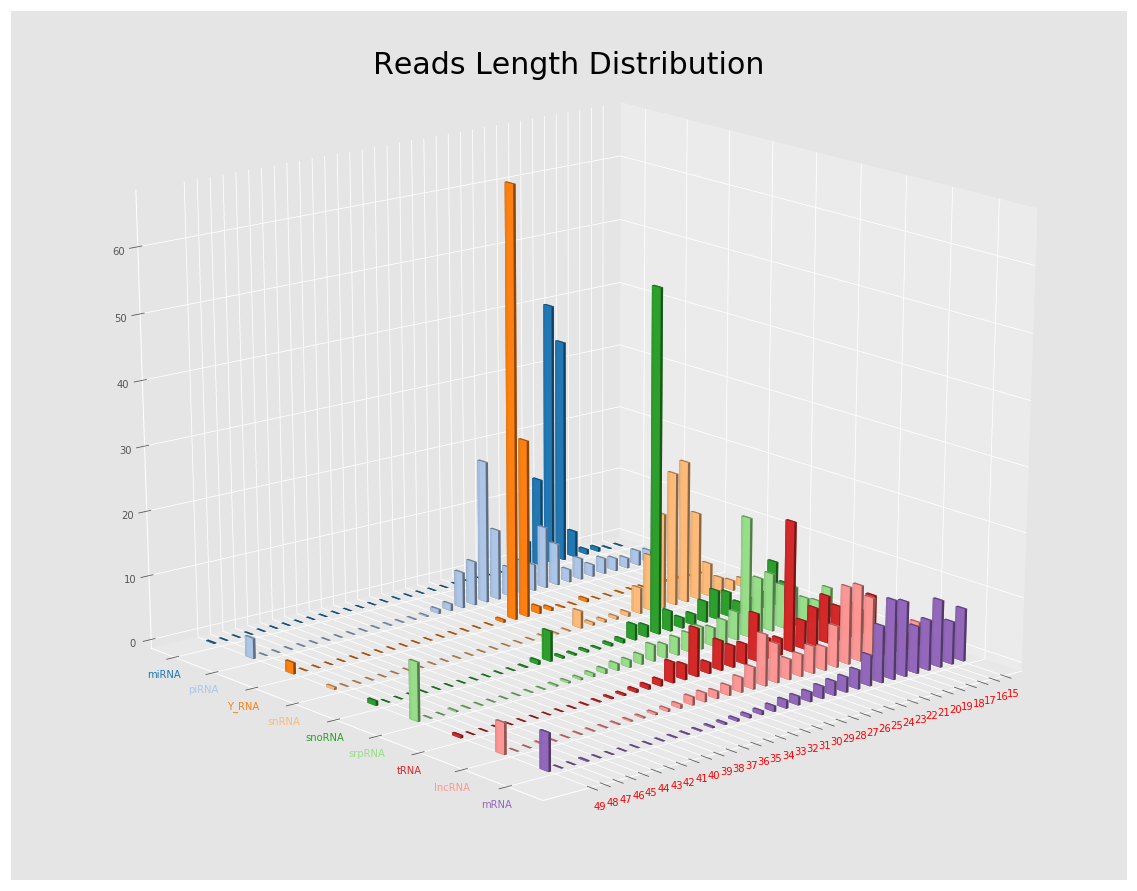

In [13]:
plot_3d(nameforlength,35,9,np.array(pd.read_table('table/per/4_len_summary.per').iloc[:,1:]).T,azim=50,elev=20)

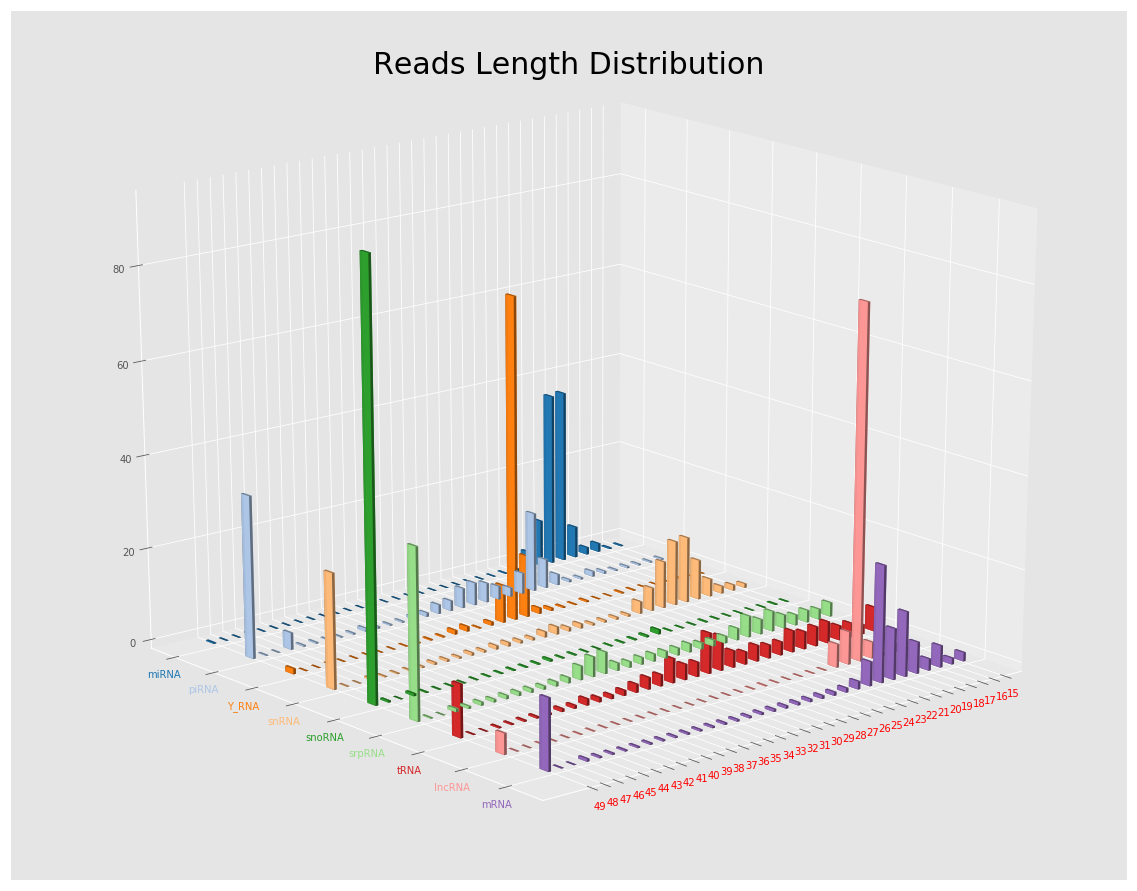

In [15]:
plot_3d(nameforlength,35,9,np.array(pd.read_table('table/per/64_len_summary.per').iloc[:,1:]).T,azim=50,elev=20)

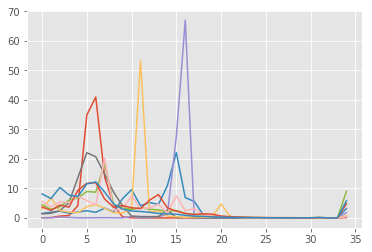

In [14]:
plt.plot(np.array(pd.read_table('table/per/4_len_summary.per').iloc[:,1:]))

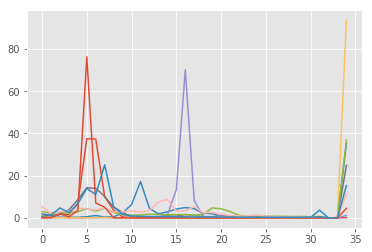

In [16]:
plt.plot(np.array(pd.read_table('table/per/64_len_summary.per').iloc[:,1:]))

## pie

In [25]:
np.average(np.array(pd.read_table('table/per/4_order_summary.per').iloc[:,2:]),axis=0)/100.

1.0

In [26]:
pd.read_table('table/per/4_order_summary.per').columns

Index([u'sample', u'cleanN', u'rRNA_N', u'miRNA', u'piRNA', u'Y_RNA', u'snRNA',
       u'snoRNA', u'srpRNA', u'tRNA', u'lncRNA', u'mRNA', u'hg38other',
       u'nonHuman_N'],
      dtype='object')

In [28]:
ratiornanames = ['rRNA_N', u'miRNA', u'piRNA', u'Y_RNA', u'snRNA',
       u'snoRNA', u'srpRNA', u'tRNA', u'lncRNA', u'mRNA', u'hg38other',
       u'nonHuman_N']

In [36]:
def draw_pie_fig(rnanames,data):
    fig = {
      "data": [
        {
          "values": data,
          "labels":rnanames,
          "domain": {"x": [0.],"y":[0.2]},
          #"name": centertext,
         # "hoverinfo":"label+percent",
          "hole": .4,
          "type": "pie"
        }]
    }
    return fig

In [37]:
py.iplot(draw_pie_fig(ratiornanames,np.average(np.array(pd.read_table('table/per/4_order_summary.per').iloc[:,2:])
                                            ,axis=0)/100.))

In [38]:
py.iplot(draw_pie_fig(ratiornanames,np.average(np.array(pd.read_table('table/per/64_order_summary.per').iloc[:,2:])
                                            ,axis=0)/100.))

In [ ]:
from ipywidgets import interact, FloatSlider, RadioButtons

interact(plot,amplitude=FloatSlider(min=0,max=1.0,step=0.01),
               color=RadioButtons(options=['blue', 'green', 'red']))

## ROC and boxplot

### boxplot

In [76]:
styles = ["dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']

def box_plot(styind,contextind,width,height,showdot,dotsize):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    tips = sns.load_dataset("tips")

    fig, ax = plt.subplots(figsize=(width,height))
    sns.boxplot(ax=ax,x="day", y="total_bill", data=tips, palette="PRGn",width=.18)
    if showdot =='yes':
        sns.swarmplot(x="day", y="total_bill", data=tips, size=dotsize, edgecolor="black", linewidth=.9)
        
    # statistical annotation
    x1, x2 = 2, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y, h, col = tips['total_bill'].max() + 2, 2, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)


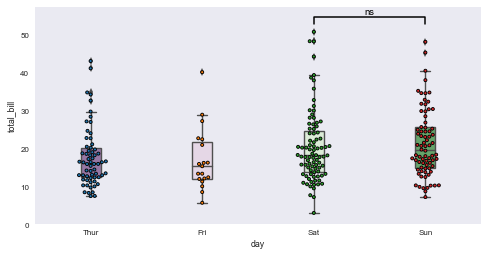

In [43]:
box_plot(0,0,8,4,'yes',3)

In [45]:
interact(box_plot,styind=FloatSlider(min=0,max=2,step=1),
               contextind=FloatSlider(min=0,max=3,step=1),
                width =FloatSlider(min=8,max=20,step=1),
                 height= FloatSlider(min=4,max=10,step=1),
         dotsize= FloatSlider(min=1,max=8,step=1),
            showdot=RadioButtons(options=['yes','no']))

interactive(children=(FloatSlider(value=0.0, description=u'styind', max=2.0, step=1.0), FloatSlider(value=0.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=8.0, description=u'width', max=20.0, min=8.0, step=1.0), FloatSlider(value=4.0, description=u'height', max=10.0, min=4.0, step=1.0), RadioButtons(description=u'showdot', options=('yes', 'no'), value='yes'), FloatSlider(value=1.0, description=u'dotsize', max=8.0, min=1.0, step=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.box_plot>

In [46]:
from sklearn.metrics import roc_curve, auc  

In [143]:
label = np.random.randint(2,size=100)
expressionlevel = np.random.rand(100)*100

In [144]:
a,b,c= roc_curve(label,expressionlevel)

In [145]:
auc(a,b)

0.5813204508856683

**产生更多的点  多类放一张图 算出最佳点**
later: 点的annotation 

In [146]:
def rocplot(styind,contextind,width,height,linewid,color,linewid2,color2,transparency):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    fig, ax = plt.subplots(figsize=(width,height))
    ax.plot(a,b,linewidth=linewid,color=color)
    ax.plot(a,b,linewidth=linewid,color=color)
    ax.plot([0,1],[0,1], linewidth=linewid2,alpha=transparency,color=color2)

In [ ]:
rocplot(0,0,6,6,3,'g',2,'r',0.5)

In [147]:
interact(rocplot,styind=FloatSlider(min=0,max=2,step=1),
               contextind=FloatSlider(min=0,max=3,step=1),
                width =FloatSlider(min=6,max=16,step=1),
                 height= FloatSlider(min=6,max=16,step=1),
        linewid= FloatSlider(min=1,max=4,step=0.3,value=3),
        color=Dropdown(options=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'],value='r'),
        linewid2= FloatSlider(min=1,max=4,step=0.3,value=2),
        transparency=FloatSlider(min=0,max=1,step=0.05,value=0.5),
        color2=Dropdown(options=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']))

interactive(children=(FloatSlider(value=0.0, description=u'styind', max=2.0, step=1.0), FloatSlider(value=0.0, description=u'contextind', max=3.0, step=1.0), FloatSlider(value=6.0, description=u'width', max=16.0, min=6.0, step=1.0), FloatSlider(value=6.0, description=u'height', max=16.0, min=6.0, step=1.0), FloatSlider(value=3.0, description=u'linewid', max=4.0, min=1.0, step=0.3), Dropdown(description=u'color', index=2, options=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'), value='r'), FloatSlider(value=2.0, description=u'linewid2', max=4.0, min=1.0, step=0.3), Dropdown(description=u'color2', options=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'), value='b'), FloatSlider(value=0.5, description=u'transparency', max=1.0, step=0.05), Output()), _dom_classes=('widget-interact',))

<function __main__.rocplot>

TODO: report 各类均值 <span class="mark">what is best?</span> <br> interpret?
<span class="girk">print pandas table of "best" four rate and four indicators</span> 
不平衡样本 average precision AUC PRC

In [148]:
fp = a
tp = b
tn = 1-a
fn = 1-b
#fpr tpr fnr tnr
Sensitivity = tp/(tp+fn) * 100
Specificity = tn/(tn+fp) * 100
PPV = tp/(tp+fp) * 100
NPV = tn/(tn+fn) * 100

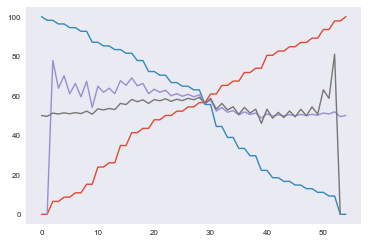

In [149]:
plt.plot(Sensitivity)
plt.plot(Specificity)
plt.plot(PPV)
plt.plot(NPV)

In [136]:
def report_metrics_best(a,b):
    fp = a
    tp = b
    tn = 1-a
    fn = 1-b
    Sensitivity = tp/(tp+fn) 
    Specificity = tn/(tn+fp) 
    PPV = tp/(tp+fp) 
    NPV = tn/(tn+fn) 
    arith_mean = (Sensitivity+Specificity)*0.5
    geo_mean = (Sensitivity*Specificity)**0.5
    harmo_mean = 2/(1/Sensitivity+1/Specificity)
    eucilid_mean = ((1-Sensitivity)**2+(1-Specificity)**2)**0.5
    mcc_mean = (tp*tn-fp*fn)/(((tp+fp)(tp+fn)(tn+fp)(tn+fn))**0.5)
    F1_score = 
    auc = auc(a,b)
    
    distoleftup = (a**2+(1-b)**2)**0.5# to the left up